In [227]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import numpy as np, scipy as sp, scipy.stats, os, sys, joblib
import os, numpy as np, scipy as sp, scipy.io, scipy.io.wavfile
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.utils import class_weight
import datetime
import random
import logging
import pandas as pd
import importlib
import useful_functions
import preprocessing_functions
import Chatgpt_model
import metrics_loss_functions
import models
import results_functions
importlib.reload(results_functions)
importlib.reload(models)
importlib.reload(metrics_loss_functions)
from results_functions import *
from models import *

from metrics_loss_functions import *
importlib.reload(useful_functions)
importlib.reload(preprocessing_functions)
importlib.reload(Chatgpt_model)
from useful_functions import *
from preprocessing_functions import *
from Chatgpt_model import *
import time
#import wandb
#from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [206]:
importlib.reload(useful_functions)
importlib.reload(preprocessing_functions)
importlib.reload(Chatgpt_model)
from useful_functions import *
from preprocessing_functions import *
from Chatgpt_model import *

In [207]:
 # Define the data and model foldes.
data_folder = r"../training_data"
model_folder = r"../model"
wind_size = 6000
verbose = 3

In [208]:
#recordings,patient_label,patient_id = create_rec_patient_list(data_folder)
recordings,patient_label,patient_id = extract_patients(data_folder)
#df = build_dataset_df(recordings,patient_id,patient_label,wind_size)
df = build_dataset_df3(recordings,patient_id,patient_label,wind_size)

df.head()

Finding data files...
Extracting features and labels from the Challenge data...
942


,patient_id,recording_type,recording,murmur
0,2530.0,1.0,"[254.62053374948147, 332.41397606699405, -727....","[0, 0, 1]"
1,2530.0,1.0,"[20.550841480663475, -18.884669077279337, 152....","[0, 0, 1]"
2,2530.0,1.0,"[2296.0082592261, 1161.8953810714854, 106.9764...","[0, 0, 1]"
3,2530.0,1.0,"[-1.2132347511973676, -24.042684343382245, -14...","[0, 0, 1]"
4,2530.0,1.0,"[219.40892010033423, 106.21377642082071, 296.9...","[0, 0, 1]"


In [209]:
#check correctness of dataframe loaded
for i in range(df.shape[0]):
  if len(df["recording"][i]) != 6000:
    print("problem sir")

In [190]:
"""nb_murmur_present = (df.loc[df['murmur'] == 1]).shape[0]
nb_murmur_absent = (df.loc[df['murmur'] == 0]).shape[0]
print(nb_murmur_present)
print(nb_murmur_absent)"""

"nb_murmur_present = (df.loc[df['murmur'] == 1]).shape[0]\nnb_murmur_absent = (df.loc[df['murmur'] == 0]).shape[0]\nprint(nb_murmur_present)\nprint(nb_murmur_absent)"

In [191]:
new_df = df[['patient_id', 'murmur']]
new_df = new_df.drop_duplicates()

TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
new_df = new_df.reset_index(drop=True)

In [ ]:
nb_murmur_present = (new_df.loc[new_df['murmur'] == (1,0,0)]).shape[0]
nb_murmur_unknown = (new_df.loc[new_df['murmur'] == (0,1,0)]).shape[0]
nb_murmur_absent = (new_df.loc[new_df['murmur'] == (0,0,1)]).shape[0]
print(nb_murmur_present)
print(nb_murmur_unknown)
print(nb_murmur_absent)

In [ ]:
new_df

In [ ]:
list_id = np.array(new_df['patient_id'])
list_label = np.array(new_df['murmur'])

In [ ]:
id_train, id_valtest, label_train, label_valtest = train_test_split(list_id, list_label , test_size=0.4, random_state=42)
id_val, id_test, label_val, label_test = train_test_split(id_valtest, label_valtest , test_size=0.5, random_state=42)

In [ ]:
def select_rows(id_list,dframe):
  #for id in list_id:
  sub_df = df.loc[df['patient_id'].isin([int(id) for id in id_list])]
  return sub_df



In [ ]:
print("Nb of rows of murmur absent : ",(df.loc[df['murmur'] == 0]).shape[0])
print("Nb of rows of murmur present : ",(df.loc[df['murmur'] == 1]).shape[0])

In [183]:
weights = class_weight.compute_class_weight(  class_weight ='balanced',
                                    classes = np.unique(y_train),
                                    y = y_train)
class_weights = dict(zip(np.unique(y_train), weights))

TypeError: unhashable type: 'numpy.ndarray'

In [210]:
from sklearn.model_selection import KFold



In [214]:
model = bnrelu_model_3(input_shape=(6000,1))
model.summary()

Model: "model_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_57 (InputLayer)       [(None, 6000, 1)]         0         
                                                                 
 conv1d_288 (Conv1D)         (None, 6000, 128)         512       
                                                                 
 batch_normalization_396 (B  (None, 6000, 128)         512       
 atchNormalization)                                              
                                                                 
 re_lu_288 (ReLU)            (None, 6000, 128)         0         
                                                                 
 conv1d_289 (Conv1D)         (None, 6000, 128)         49280     
                                                                 
 batch_normalization_397 (B  (None, 6000, 128)         512       
 atchNormalization)                                       

In [ ]:
X = list_id
Y = list_label
kfold = KFold(n_splits=5, shuffle=True, random_state=random.randint(1, 100))


time1 = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
dir_path = "checkpoint_dir/"+ time1

auc = tf.keras.metrics.AUC(name='auc',curve='PR')


total_duration = 0

epochs = 100
batch_size = 32

if not os.path.exists('logdir'):
    os.makedirs('logdir')
    
# Set up the log filename using the current timestamp
logger = logging.getLogger()
for handler in logger.handlers[:]:
    handler.close()
    logger.removeHandler(handler)
    
log_filename = os.path.join('logdir', f'bnrelu_model_final{time1}.log')
logging.basicConfig(filename=log_filename, filemode='w', format='%(asctime)s - %(message)s', level=logging.INFO)


i=1
for train_index, test_index in kfold.split(X,Y):
    start_time = time.time()  # Record start time of the loop
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train , test_size=0.25, random_state=42)

    
    df_train = select_rows(X_train,df)
    df_val = select_rows(X_val,df)   
    df_test = select_rows(X_test,df)
    
    df_train['murmur'] = df_train['murmur'].apply(lambda x: np.array(x, dtype=np.float32))
    df_val['murmur'] = df_val['murmur'].apply(lambda x: np.array(x, dtype=np.float32))
    df_test['murmur'] = df_test['murmur'].apply(lambda x: np.array(x, dtype=np.float32))

    
    
    X_train = np.vstack(df_train['recording'].to_numpy())
    y_train = np.vstack(df_train['murmur'].to_numpy())

    X_val = np.vstack(df_val['recording'].to_numpy())
    y_val = np.vstack(df_val['murmur'].to_numpy())

    X_test = np.vstack(df_test['recording'].to_numpy())
    y_test = np.vstack(df_test['murmur'].to_numpy())
    
    X_train = X_train.reshape(len(X_train),len(X_train[1]),1)
    X_val = X_val.reshape(len(X_val),len(X_val[1]),1)
    X_test = X_test.reshape(len(X_test),len(X_test[1]),1)
    
    checkpoint_path = dir_path + "bnrelu_model_final/"+"M_"+str(i)+"_cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1,restore_best_weights=True,mode='min')

    callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.0001
    ),
    early_stopping_callback,
    ]
    
    adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    #sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
    
    model = bnrelu_model_3(input_shape=X_train.shape[1:])
    model.compile(
        optimizer=adam,
        loss=weighted_catcrossentropy,
        metrics=[auc],
        weighted_metrics = 'acc' ,
    )

    history = model.fit(
        X_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=(X_val,y_val),
        verbose=0,
    )
    
    model.save_weights(dir_path + "bnrelu_model_final/"+"M_"+str(i)+"_restored_weight"+"_cp.ckpt")
    
    pred = model.predict(X_test)
    
    mean,maj = get_mean_maj_preds_3_class(pred,df_test)
    y_true = get_ytrue3(df_test)
    w_acc_maj = weighted_accuracy(maj,y_true)
    w_acc_mean = weighted_accuracy(mean,y_true)
    
    # Compute the duration
    loop_duration = time.time() - start_time
    total_duration += loop_duration  # Add to the total duration
                                   
    logging.info('Predictions Mean - Set %d: %s', i, mean)
    logging.info('Predictions Maj - Set %d: %s', i, maj)
    logging.info('Actual Labels - Set %d: %s', i, y_true)
    logging.info('Weighted Accuracy Score Mean - Entry %d: %f', i, w_acc_mean)
    logging.info('Weighted Accuracy Score Maj - Entry %d: %f', i, w_acc_maj)
    if early_stopping_callback.stopped_epoch > 0:  # Means early stopping was triggered
        logging.info('Early Stopping at Epoch %d', early_stopping_callback.stopped_epoch)
    logging.info('Total duration yet %d: %f seconds', i, total_duration)
    
    
    i = i+1


/tmp/ipykernel_3922/1728044024.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['murmur'] = df_train['murmur'].apply(lambda x: np.array(x, dtype=np.float32))
/tmp/ipykernel_3922/1728044024.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['murmur'] = df_val['murmur'].apply(lambda x: np.array(x, dtype=np.float32))
/tmp/ipykernel_3922/1728044024.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va


Epoch 1: saving model to checkpoint_dir/20230823-164254bnrelu_model_final/M_1_cp.ckpt

Epoch 2: saving model to checkpoint_dir/20230823-164254bnrelu_model_final/M_1_cp.ckpt

Epoch 3: saving model to checkpoint_dir/20230823-164254bnrelu_model_final/M_1_cp.ckpt

Epoch 4: saving model to checkpoint_dir/20230823-164254bnrelu_model_final/M_1_cp.ckpt

Epoch 5: saving model to checkpoint_dir/20230823-164254bnrelu_model_final/M_1_cp.ckpt

Epoch 6: saving model to checkpoint_dir/20230823-164254bnrelu_model_final/M_1_cp.ckpt

Epoch 7: saving model to checkpoint_dir/20230823-164254bnrelu_model_final/M_1_cp.ckpt

Epoch 8: saving model to checkpoint_dir/20230823-164254bnrelu_model_final/M_1_cp.ckpt


In [114]:
pred = model.predict(X_test)

157/157 [==============================] - 3s 17ms/step


[[1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.

0.7741935483870968


{0: 1.7893182086730475, 1: 6.730222222222222, 2: 0.4361965664247033}


In [218]:
y_true = [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]

In [219]:
mean = [[1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]

In [220]:
def one_hot_to_label(one_hot_array):
    return np.argmax(one_hot_array, axis=1)

In [225]:
y_true_labels = [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
y_pred_labels = [1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]

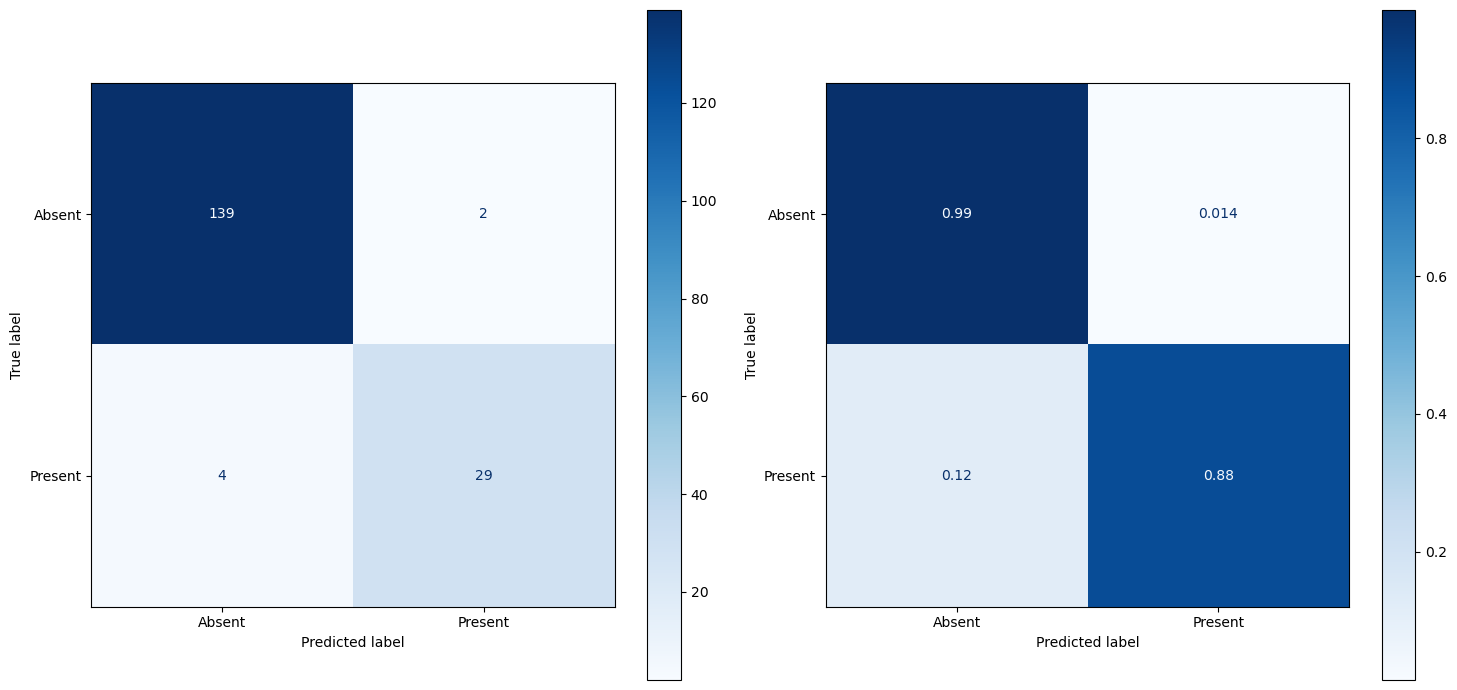

In [226]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

class_names = ["Absent" , "Present"]

ConfusionMatrixDisplay.from_predictions(y_true_labels, y_pred_labels, ax=axes[0],
                                        cmap='Blues', normalize=None, display_labels=class_names)

ConfusionMatrixDisplay.from_predictions(y_true_labels, y_pred_labels, ax=axes[1],
                                        cmap='Blues', normalize='true', display_labels=class_names)

plt.tight_layout()
plt.show()



In [108]:
X = list_id
Y = list_label
kfold = KFold(n_splits=5, shuffle=True, random_state=random.randint(1, 100))


time1 = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
dir_path = "checkpoint_dir/"+ time1

auc = tf.keras.metrics.AUC(name='auc',curve='PR')


total_duration = 0

epochs = 100
batch_size = 32

if not os.path.exists('logdir'):
    os.makedirs('logdir')
    
# Set up the log filename using the current timestamp
logger = logging.getLogger()
for handler in logger.handlers[:]:
    handler.close()
    logger.removeHandler(handler)
    
log_filename = os.path.join('logdir', f'bnrelu_model_156u{time1}.log')
logging.basicConfig(filename=log_filename, filemode='w', format='%(asctime)s - %(message)s', level=logging.INFO)


i=1
for train_index, test_index in kfold.split(X,Y):
    start_time = time.time()  # Record start time of the loop
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train , test_size=0.25, random_state=42)

    
    df_train = select_rows(X_train,df)
    df_val = select_rows(X_val,df)
    df_test = select_rows(X_test,df)
    
    X_train = np.vstack(df_train['recording'])
    X_train = X_train.reshape(len(X_train),len(X_train[1]),1)
    y_train = np.array(df_train['murmur'])
    
    X_val = np.vstack(df_val['recording'])
    X_val = X_val.reshape(len(X_val),len(X_val[1]),1)
    y_val = np.array(df_val['murmur'])
    
    X_test = np.vstack(df_test['recording'])
    X_test = X_test.reshape(len(X_test),len(X_test[1]),1)
    y_test = np.array(df_test['murmur'])
    
    checkpoint_path = dir_path + "bnrelu_model_156u/"+"M_"+str(i)+"_cp.ckpt"
    checkpoint_dir = os.path.dirname(checkpoint_path)
    
    early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1,restore_best_weights=True,mode='min')

    callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.0001
    ),
    early_stopping_callback,
    ]
    
    adam = tf.keras.optimizers.Adam(learning_rate=0.001)
    #sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
    
    model = bnrelu_model_156u(input_shape=X_train.shape[1:])
    model.compile(
        optimizer=adam,
        loss=weighted_bincrossentropy,
        metrics=[auc],
        weighted_metrics = 'acc' ,
    )

    history = model.fit(
        X_train,
        np.array(y_train),
        batch_size=batch_size,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=(X_val,np.array(y_val)),
        verbose=0,
    )
    
    model.save_weights(dir_path + "bnrelu_model_156u/"+"M_"+str(i)+"_restored_weight"+"_cp.ckpt")
    
    pred = model.predict(X_test)
    
    mean,maj = get_mean_maj_preds(pred,df_test)
    y_true = get_y_true(df_test)
    w_acc_maj = compute_weight_acc(maj,y_true)
    w_acc_mean = compute_weight_acc(mean,y_true)
    
    # Compute the duration
    loop_duration = time.time() - start_time
    total_duration += loop_duration  # Add to the total duration
                                   
    logging.info('Predictions Mean - Set %d: %s', i, mean)
    logging.info('Predictions Maj - Set %d: %s', i, maj)
    logging.info('Actual Labels - Set %d: %s', i, y_true)
    logging.info('Weighted Accuracy Score Mean - Entry %d: %f', i, w_acc_mean)
    logging.info('Weighted Accuracy Score Maj - Entry %d: %f', i, w_acc_maj)
    if early_stopping_callback.stopped_epoch > 0:  # Means early stopping was triggered
        logging.info('Early Stopping at Epoch %d', early_stopping_callback.stopped_epoch)
    logging.info('Total duration yet %d: %f seconds', i, total_duration)
    
    
    i = i+1


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

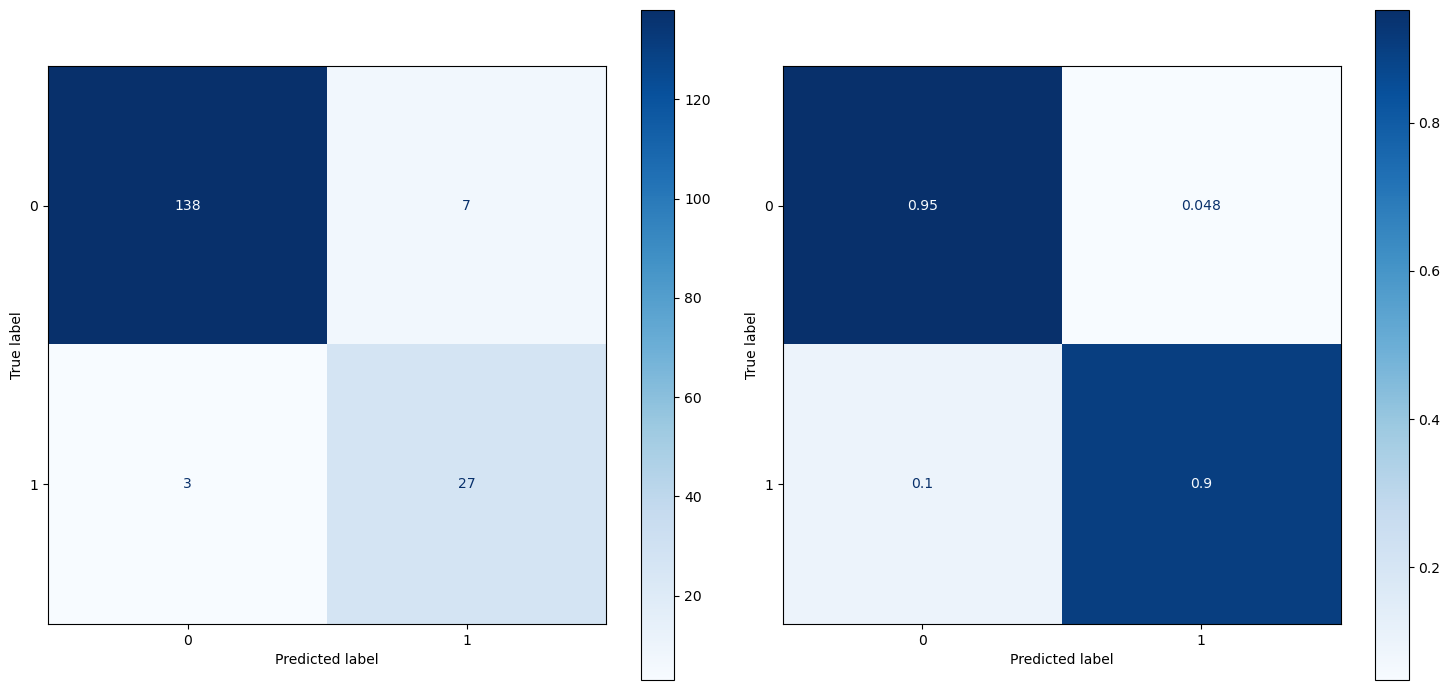

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))


ConfusionMatrixDisplay.from_predictions(y_true, pred,ax=axes[0],
                                        cmap='Blues', normalize = None)

ConfusionMatrixDisplay.from_predictions(y_true, pred,ax=axes[1],
                                        cmap='Blues', normalize = 'true')

plt.tight_layout()  
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))


ConfusionMatrixDisplay.from_predictions(y_true, maj,ax=axes[0],
                                        cmap='Blues', normalize = None)

ConfusionMatrixDisplay.from_predictions(y_true, maj,ax=axes[1],
                                        cmap='Blues', normalize = 'true')

plt.tight_layout()  
plt.show()

In [39]:
log_filename = os.path.join('logdir', f'bnrelu_model_samp1000_adam_{time}.log')
logging.basicConfig(filename=log_filename, filemode='w', format='%(asctime)s - %(message)s', level=logging.INFO)

logger = logging.getLogger()
for handler in logger.handlers[:]:
    handler.close()
    logger.removeHandler(handler)